In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fixed-Width Binning

Basically we pre-assign the ranges of values and their respective classes

In [3]:
df = pd.read_csv("../../datasets/fcc_2016_coder_survey_subset.csv")
df.head()
features_to_vis = ["ID.x", "Age", "Age_bin_custom_range", "Age_bin_custom_label", "Age_bin_rounding"]

Text(0, 0.5, 'Frequency')

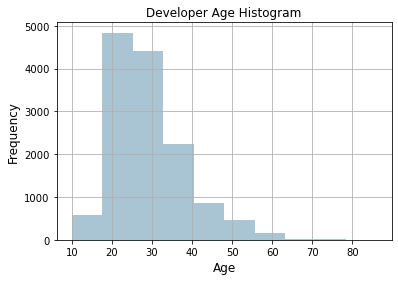

In [4]:
fontsize = 12
fig, ax = plt.subplots()
df["Age"].hist(color="#A9C5D3")
ax.set_title("Developer Age Histogram", fontsize=fontsize)
ax.set_xlabel("Age", fontsize=fontsize)
ax.set_ylabel("Frequency", fontsize=fontsize)

In [5]:
# Rounding the age
df["Age_bin_rounding"] = np.array(np.floor(np.array(df["Age"]) / 10))

### Specify the bin ranges

We wanna use this ranges:

    **Age** : **Bin**

    0 - 15  :    1
    16 - 30 :    2
    31 - 45 :    3
    46 - 60 :    4
    61 - 75 :    5
    76 - 100:    6

In [7]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]

df["Age_bin_custom_range"] = pd.cut(np.array(df["Age"]), bins=bin_ranges)
df["Age_bin_custom_label"] = pd.cut(np.array(df["Age"]), bins=bin_ranges, labels=bin_names)

df[features_to_vis].iloc[1071:1076]

,ID.x,Age,Age_bin_custom_range,Age_bin_custom_label,Age_bin_rounding
1071,6a02aa4618c99fdb3e24de522a099431,17.0,"(15, 30]",2,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,"(30, 45]",3,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,"(15, 30]",2,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,"(45, 60]",4,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,"(30, 45]",3,3.0


### Observations

- pd.cut -> Bin values into discrete intervals
    As parameters: 
        x, the array of values
        bins, an array with the bins values
        labeld, an array with the bins names


Text(0, 0.5, 'Frequency')

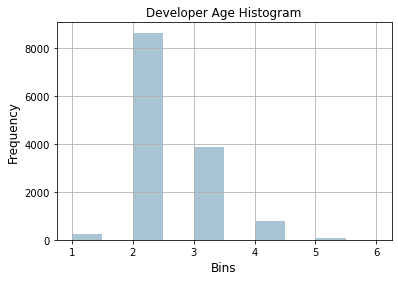

In [11]:
fig, ax = plt.subplots()
df["Age_bin_custom_label"].hist(color="#A9C5D3")
ax.set_title("Developer Age Histogram", fontsize=fontsize)
ax.set_xlabel("Bins", fontsize=fontsize)
ax.set_ylabel("Frequency", fontsize=fontsize)